# 1. Trabajo Práctico N°2: de Analisis + Curación

# Trabajo Práctico N°2: Análisis Exploratorio y Curación de Datos

## Introducción

Este trabajo práctico intenta continúa la exploración de los datasets planteados en el [primer trabajo práctico](https://github.com/luisdvlpr/diplodatos2021-datasets/blob/main/TP1_Analisis_y_Visualizacion/enunciado_tp1_analisis_y_visualizacion.ipynb)

En el primer práctico pudimos notar algunas características propias de las series temporales y en particular del dominio del comportamiento de un ecommerce genérico. Muchas de ellas son __series no estacionarias__, ya que la caracterización de estas distribuciones ( media, varianza ) cambian a través del tiempo y se observan ademas alguna tendencias. __Por otra parte se se distinguen patrones de estacionalidad, por ej. semanal__. 

Lo anterior trae __consecuencias__ directas en la selección de las metodologías adecuadas para abordar las problemáticas de tratamiento de __valores faltantes__, detección de __outliers__ y la construcción de __modelos predictivos__.

Por otra parte, debe notarse que el tamaño de las economías de cada pais y la adopción de los hábitos de uso de estas plataformas en cada uno de ellos hace que el uso de cantidad de sesiones no sea una medida adecuada para compararles. Entonces, el análisis de estas series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los índices originales, previamente se habitúa realizar una __transformación logarítmica__ o trabajar con la __tasa de conversión__ a fin de expresarlos en un __único métrica que les caracterice__ para evitar distorsiones debidas a los tamaños de sus economías y hábitos de uso.

# Consignas del trabajo práctico N°2

El objetivo general del práctico es realizar algunas tareas de __preprocesamiento__ de los datos y luego __analizar las series obtenidas__ de dicho preprocesamiento en forma similar a la empleada en el TP1.

Se proponen las siguientes actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales:

#### Tratamiento de faltantes

- Identificar valores perdidos, huecos en los datos ej: aquellos días para los que no hubo datos

- Identificar aquellos valores "sospechosos", debido al dropout ( o perdida de sesiones) a medidas que avanzas en 
  las pantallas la cantidad de sesiones en la pantalla posterior es menor/igual al de su predecesora

- Imputar los valores sospechoso con otros que tengan sentido dentro del dominio segun lo explicado en el punto anterior

- Imputar los faltantes debidos a fallas de medición usando un algoritmo adecuado para series temporales, 
  por ejemplo splines, interpolaciones, valores de medias/medianas móviles por ventana de tiempo

- Comparar los valores originales vs los imputados y juzgue si los valores se mantienen dentro de parametros aceptables, ¿Como justificaría que dichos valores imputados tienen sentido en su analisis?


#### Transformaciones

Obtener las siguientes series transformadas:

- Los logaritmos naturales de los índices. 

- Las tasas de conversion.

#### Exploración de las series transformadas

Reutilizar parte del código del TP1 para analizar las series transformadas. En una primera etapa se puede trabajar con solo una de las series resultantes de tomar logaritmo natural y una serie de tasa de conversión.

- Analizar las distribuciones por medio de gráficos y medidas de estadística descriptiva.

- Dichas distribuciones, ¿se mantienen relativamente inalteradas en el tiempo?

- ¿Hay outliers?

- Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse? ¿Tienden a moverse en forma conjunta?  ¿Siempre se da dicho patrón? ¿Hay períodos de crisis? En caso de que existan crisis / eventos , ¿Son globales o propias de sites individuales? 

- To Be defined: De ser definido, podemos establecer un grupo de control versus ls valores imputados y establecer 
  que tan buenos resultaron los métodos ejecutados para rellenar los valores respecto de los deseables

#### Opcional
- Graficar e interpretar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).
- Explorar la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

## Fecha de entrega

- __Versión preliminar: 03/07__ 

- __Version final: 07/07__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo puede orientarse para un público técnico pero que desconoce los aspectos propios del problema como sus compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se explique un análisis escrito suficientemente detallado de los resultados. 


### Resolución

1. Identificar valores perdidos, huecos en los datos ej: aquellos días para los que no hubo datos

##### Carga del dataset

In [12]:
import numpy as np
import pandas as pd
 
%matplotlib inline
import matplotlib.pyplot as plt

import missingno as msno

In [2]:
# some config
plt.rcParams['figure.figsize'] = (12, 9)

In [8]:
traffic_data = pd.read_csv("traffic_AR_CL_UY.csv", usecols = ["Fecha", "flow", "Site", "Device", "Loading", "Shipping", "Payments", "Review", "Congrats"], parse_dates=["Fecha"], index_col=["Fecha"])

traffic_data
#parse_dates: hacer que pandas establezca la variable fecha como "datetime" en vez de "object".

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
Fecha,,,,,,,,
2019-03-01,cart,MLA,Android,0,7084,5313,3981,3731
2019-03-01,cart,MLA,Desktop,0,5419,4177,3580,3479
2019-03-01,cart,MLA,Mobile,0,2426,1832,1373,1290
2019-03-01,cart,MLA,iOS,0,1179,856,671,622
2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856
...,...,...,...,...,...,...,...,...
2020-06-30,direct,MLC,iOS,29876,29952,25386,21049,19642
2020-06-30,direct,MLU,Android,30437,30534,24870,18660,17698
2020-06-30,direct,MLU,Desktop,9859,9767,8177,6690,6566


In [9]:
traffic_data["Weekday"] = traffic_data.index.day_name()
traffic_data["Month"] = traffic_data.index.month
traffic_data["Year"] = traffic_data.index.year

new = traffic_data["Month"].copy().astype(str)
new1 = traffic_data["Year"].copy().astype(str)

# concatenating team with name column
# overwriting name column
traffic_data["Months"]= new1.str.cat(new, sep ="-")

In [43]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7709 entries, 2019-03-01 to 2020-06-30
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flow      7709 non-null   object
 1   Site      7709 non-null   object
 2   Device    7709 non-null   object
 3   Loading   7709 non-null   int64 
 4   Shipping  7709 non-null   int64 
 5   Payments  7709 non-null   int64 
 6   Review    7709 non-null   int64 
 7   Congrats  7709 non-null   int64 
 8   Weekday   7709 non-null   object
 9   Month     7709 non-null   int64 
 10  Year      7709 non-null   int64 
 11  Months    7709 non-null   object
 12  c_r       7709 non-null   int64 
 13  r_p       7709 non-null   int64 
 14  p_s       7709 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 963.6+ KB


<AxesSubplot:>

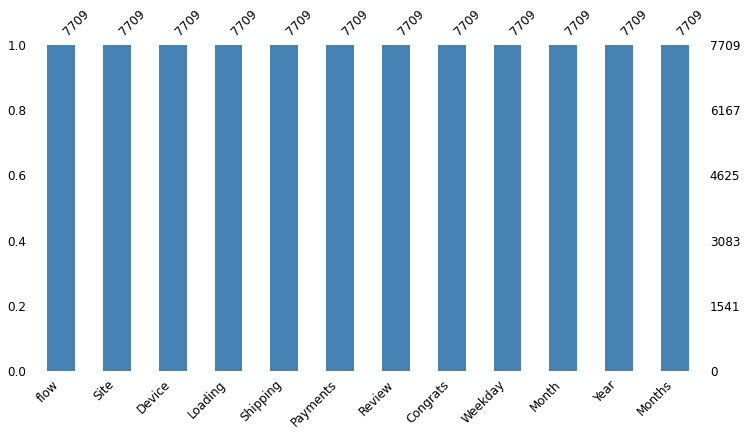

In [14]:
msno.bar(traffic_data,figsize=(12, 6), fontsize=12, color='steelblue')

In [27]:
traffic_data = traffic_data.assign(c_r = traffic_data['Review'] - traffic_data['Congrats'],
                                   r_p = traffic_data['Payments'] - traffic_data['Review'], 
                                   p_s = traffic_data['Shipping'] - traffic_data['Payments'])

traffic_data

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Weekday,Month,Year,Months,c_r,r_p,p_s
Fecha,,,,,,,,,,,,,,,
2019-03-01,cart,MLA,Android,0,7084,5313,3981,3731,Friday,3,2019,2019-3,250,1332,1771
2019-03-01,cart,MLA,Desktop,0,5419,4177,3580,3479,Friday,3,2019,2019-3,101,597,1242
2019-03-01,cart,MLA,Mobile,0,2426,1832,1373,1290,Friday,3,2019,2019-3,83,459,594
2019-03-01,cart,MLA,iOS,0,1179,856,671,622,Friday,3,2019,2019-3,49,185,323
2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856,Friday,3,2019,2019-3,5524,35171,27759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,direct,MLC,iOS,29876,29952,25386,21049,19642,Tuesday,6,2020,2020-6,1407,4337,4566
2020-06-30,direct,MLU,Android,30437,30534,24870,18660,17698,Tuesday,6,2020,2020-6,962,6210,5664
2020-06-30,direct,MLU,Desktop,9859,9767,8177,6690,6566,Tuesday,6,2020,2020-6,124,1487,1590


In [39]:
traffic_data.describe()

,Loading,Shipping,Payments,Review,Congrats,Month,Year,c_r,r_p,p_s
count,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000
mean,59812.627578,41020.260215,32995.177195,23618.913218,22062.731353,6.049293,2019.379297,1556.181865,9376.263977,8025.083020
std,90159.336686,68292.573307,55533.579166,38040.625869,35394.961006,3.163985,0.485244,2872.016593,17898.457531,13023.886294
min,0.000000,19.000000,17.000000,10.000000,8.000000,1.000000,2019.000000,0.000000,0.000000,0.000000
25%,6805.000000,6485.000000,5241.000000,4109.000000,3866.000000,4.000000,2019.000000,180.000000,1039.000000,1166.000000
50%,22340.000000,14553.000000,11036.000000,8379.000000,7631.000000,6.000000,2019.000000,518.000000,2439.000000,3276.000000
75%,75071.000000,40908.000000,32645.000000,24390.000000,22674.000000,9.000000,2020.000000,1625.000000,7875.000000,8277.000000
max,563592.000000,537723.000000,444330.000000,286162.000000,264742.000000,12.000000,2020.000000,25236.000000,177198.000000,134301.000000


In [44]:
traffic_data.interpolate()

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,Weekday,Month,Year,Months,c_r,r_p,p_s
Fecha,,,,,,,,,,,,,,,
2019-03-01,cart,MLA,Android,0,7084,5313,3981,3731,Friday,3,2019,2019-3,250,1332,1771
2019-03-01,cart,MLA,Desktop,0,5419,4177,3580,3479,Friday,3,2019,2019-3,101,597,1242
2019-03-01,cart,MLA,Mobile,0,2426,1832,1373,1290,Friday,3,2019,2019-3,83,459,594
2019-03-01,cart,MLA,iOS,0,1179,856,671,622,Friday,3,2019,2019-3,49,185,323
2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856,Friday,3,2019,2019-3,5524,35171,27759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,direct,MLC,iOS,29876,29952,25386,21049,19642,Tuesday,6,2020,2020-6,1407,4337,4566
2020-06-30,direct,MLU,Android,30437,30534,24870,18660,17698,Tuesday,6,2020,2020-6,962,6210,5664
2020-06-30,direct,MLU,Desktop,9859,9767,8177,6690,6566,Tuesday,6,2020,2020-6,124,1487,1590


## Referencias adicionales

[pandas e interpolate ]( https://pandas.pydata.org/docs/reference/api/pandas.Series.interpolate.html)

[Manejo de valores perdidos]( https://pandas-docs.github.io/pandas-docs-travis/user_guide/missing_data.html )

https://towardsdatascience.com/a-practical-guide-on-missing-values-with-pandas-8fb3e0b46c24

https://towardsdatascience.com/handling-missing-values-the-exclusive-pythonic-guide-9aa883835655


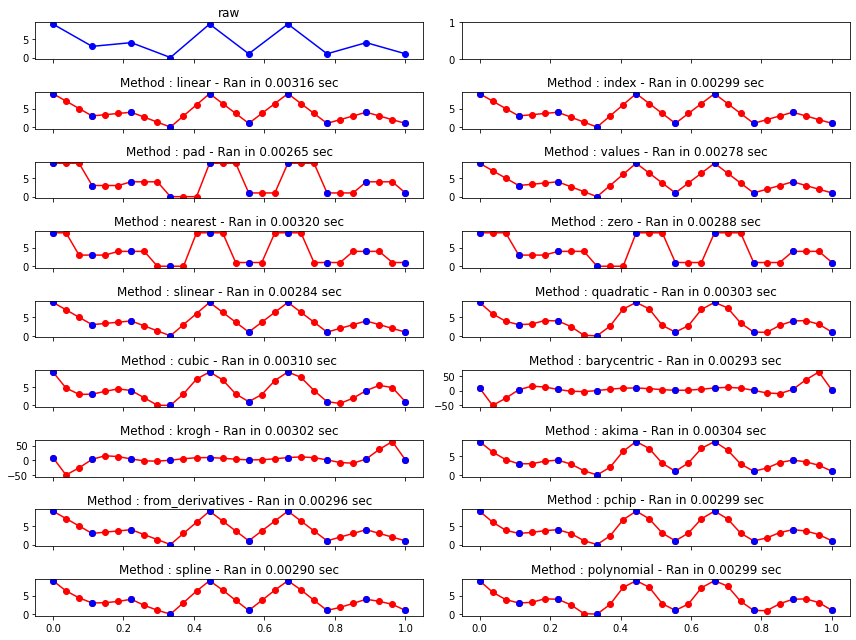

In [8]:

# Ejemplo comparativo de uso de interpolación
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

np.random.seed(6)
# kinds = ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic')
kinds = ('linear', 'index', 'pad', 'values', 'nearest', 'zero', 'slinear',
         'quadratic', 'cubic', 'barycentric', 'krogh', 'akima',
         'from_derivatives', 'pchip', 'spline', 'polynomial')

N = 10
x = np.linspace(0, 1, N)
y = np.random.randint(10, size=(N,))

new_x = np.linspace(0, 1, 28)
fig, axs = plt.subplots(nrows=len(kinds) // 2 + 1, ncols=2, sharex=True)
axs[0, 0].plot(x, y, 'bo-')
axs[0, 0].set_title('raw')
i = 1
for ((_, _), ax), kind in zip(np.ndenumerate(axs[1:, :]), kinds):
    start_time = time.time()
    df1 = pd.DataFrame({'x': x, 'y': y})
    df1 = df1.set_index('x')
    df2 = pd.DataFrame({'x': new_x})
    df2 = df2.set_index('x')
    df = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
    if kind == 'spline' or kind == 'polynomial':
        df = df.interpolate(method=kind, order=2)
    else:
        df = df.interpolate(method=kind)
    ax.plot(df, 'ro-')
    ax.plot(x, y, 'bo')
    end_time = (time.time() - start_time)
    title = f'Method : {kind} - Ran in {end_time:.5f} sec'
    ax.set_title(title)
    
fig.tight_layout()
plt.show()